##### Metody obliczeniowe w nauce i technice

## Laboratorium 10 - Dyskretna Transformacja Fouriera

### Sprawozdanie sporządził: Marcin Zielonka

### Wstęp

Do realizacji zadań skorzystam z gotowych funkcjonalności zawartych w bibliotekach:
- `numpy` - wersja `1.18.2`
- `matplotlib`
- `cmath`
- `scipy`
- `math`

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cmath
import time
import math

### Zadanie 1: FFT

Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera $\mathbf{F}_n$ i $n$-elementowego wektora wejściowego ($\mathbf{y}=\mathbf{F}_n\mathbf{x}$).

$$n=2^r$$
$$[\mathbf{F}_n]_{jk}=\xi^{jk}$$
$$\xi=e^{-\frac{2 \pi i}{n}}=\cos{\frac{2\pi}{n}}-i\sin{\frac{2\pi}{n}}=\bar{\omega}$$

Korzystając ze wzorów podanych w treści zadania, a także literatury *Wprowadzenie do algorytmów* T.H. Cormena i informacji dostępnych na stronie https://pl.wikipedia.org/wiki/Dyskretna_transformata_Fouriera, zaimplementowałem funkcję dokonującą dyskretną transformację Fouriera:

In [2]:
def dft(X):
    n = len(X)
    
    F = np.array([[0j] * n] * n)
    
    for j in range(n):
        for k in range(n):
            F[j][k] = cmath.exp(-2 * cmath.pi * 1j / n) ** (j * k)
            
    return F @ X

Zaimplementuj również IDFT korzystając z tożsamości:

$$\mathbf{F}_n^{-1}\mathbf{y}=\frac{\mathbf{\bar{F}}_n\mathbf{y}}{n}=\frac{\bar{\mathbf{F}_n\bar{\mathbf{y}}}}{n}$$



W analogiczny sposób zaimplementowałem funkcję realizującą IDFT (korzystałem głównie z informacji zamieszczonych na stronie https://pl.wikipedia.org/wiki/Dyskretna_transformata_Fouriera):

In [3]:
def idft(Y):
    n = len(Y)
    
    F_INV = np.array([[0j] * n] * n)
    
    for j in range(n):
        for k in range(n):
            F_INV[j][k] = 1 / n * cmath.exp(2 * cmath.pi * 1j / n) ** (j * k)
    
    return F_INV @ Y

Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną ($\mathbf{x}=\mathbf{F}_n^{−1}\mathbf{y}$) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.

Korzystając ze wzoru na transformację odwrtoną oraz funkcjonalności w bibliotece `numpy` (tj. uzyskanie macierzy odwrotnej), zaimplementowałem funkcję realizującą działanie odwrotne do DFT:

In [4]:
def dft_inv(Y):
    n = len(Y)
    
    F = np.array([[0j] * n] * n)
    
    for j in range(n):
        for k in range(n):
            F[j][k] = cmath.exp(-2 * cmath.pi * 1j / n) ** (j * k)
            
    return np.linalg.inv(F) @ Y

Następnie sprawdziłem poprawność działania zaimplementowanych funkcji porównując wyniki z wynikami otrzymanymi przy użyciu funkcji bibliotecznej `numpy.fft.fft`, a także dokonując na otrzymanych wynikach transformacji odwrotnej:

In [5]:
X = [10, 12, 1, 9, 3]

Y_dft = dft(X)
X_inv = dft_inv(Y_dft)

Y = np.fft.fft(X)

print(f'X:\n {X}')
print(f'Y:\n {Y}')
print(f'dft zaimplementowane:\n {Y_dft}')
print(f'X po transformacji odwrotnej:\n {X_inv}')

X:
 [10, 12, 1, 9, 3]
Y:
 [35.         +0.j          6.54508497 -3.85722663j
  0.95491503-12.8985194j   0.95491503+12.8985194j
  6.54508497 +3.85722663j]
dft zaimplementowane:
 [35.         +0.j          6.54508497 -3.85722663j
  0.95491503-12.8985194j   0.95491503+12.8985194j
  6.54508497 +3.85722663j]
X po transformacji odwrotnej:
 [10.-8.88178420e-16j 12.-1.11022302e-15j  1.+8.88178420e-16j
  9.-3.33066907e-16j  3.+6.66133815e-16j]


Jak widać wyniki są zgodne uwzględniając błąd $\epsilon$ występujący przy obliczeniach.

Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz $\mathbf{F}_n$ dla danych o różnym rozmiarze.

Korzystając z informacji zamieszczonych na stronie https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm, zaimplementowałem rekurencyjny algorytm realizujący szybką transformację Fouriera:

In [6]:
def colley_turkey(X):
    n = len(X)
    X = list(map(lambda x: x + 0j, X))
    
    if n == 1:
        return X
    else:
        even = np.array(X[0:n:2])
        odd = np.array(X[1:n:2])
        
        even = colley_turkey(even)
        odd = colley_turkey(odd)
        
        for i in range(math.floor(n / 2)):
            t = cmath.exp(-2 * cmath.pi * 1j * i / n) * odd[i]
            X[i] = even[i] + t
            X[math.floor(n / 2) + i] = even[i] - t
        
        return X

Dodatkowo, utworzyłem funkcję pomocniczą, która oblicza czas działania funkcji w nanosekundach:

In [7]:
def evaluate_time(function, args, probes):
    sum = 0
    
    for i in range(probes):
        start = time.time_ns()
        function(args)
        end = time.time_ns()
        
        sum += (end - start)
    
    return sum / probes

Następnie utworzyłem fukcję, która jako parametry przyjmuje ilość zestawów próbek do transformacji oraz ilość wykonanych transformacji dokonanych na jednym zestawie próbek (aby uzyskać dokładniejsze wyniki pomiaru czasu jako średnia z $n$ dokonanych transformacji). 

Funkcja ta porównuje czasy działania trzech funkcji:
- zaimplementowanej funkcji realizującej DFT
- zaimplementowanej funkcji realizującej algorytm Colley-Turkey'a
- funkcji bibliotecznej `numpy.fft.fft`

In [8]:
def check_times(probes, probes_per_once=1):
    dft_times = []
    numpy_fft_times = []
    colley_turkey_times = []
    xs = np.linspace(1, (probes - 1), num=(probes - 1))
    
    for n in range(1, probes):
        X = np.random.randint(1, 100, size=n)
        dft_times.append(evaluate_time(dft, X, probes_per_once))
        numpy_fft_times.append(evaluate_time(np.fft.fft, X, probes_per_once))
        colley_turkey_times.append(evaluate_time(colley_turkey, X, probes_per_once))
    
    plt.plot(xs, dft_times, 'b')
    plt.plot(xs, numpy_fft_times, 'r')
    plt.plot(xs, colley_turkey_times, 'g')
    
    plt.show()

W celu sprawdzenia efektywności poszczególnych funkcji, dokonałem sprawdzenia czasów ich wykonania dla 200 zestawów próbek (każda kolejny zestaw większy o jedną próbkę od poprzedniego, rozpoczynając od zestawu 1-elementowego) oraz sprawdzenie dla każdego z zestawów jest wykonanywane 10 razy.

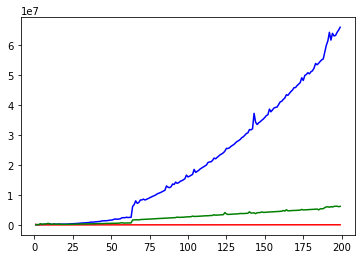

In [9]:
check_times(200, probes_per_once=10)

Jak możemy zauważyć czas zaimplementowanej funkcji DFT (kolor niebieski) rośnie kwadratowo w stosunku do rozmiaru zestawu próbek. Funkcja implementująca algorytm Colley-Turkey'a (kolor zielony) jest o wiele bardziej efektywna (wg założeń ma złożoność $O(NlogN)$). Natomiast funkcja biblioteczna `numpy.fft.fft` jest o wiele lepiej zoptymalizowana, w związku z czym dała najlepsze rezultaty czasowe.

### Zadanie 2: DFT w 1D

Wygeneruj dwa sygnały czasowo-amplitudowe:
- Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach
- Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część urojoną wyniku transformacji.

Na początku stworzyłem funkcję pomocniczą, która generuje sygnał, który będzie wykorzystany do dokonania transformacji. Funkcja ta przyjmuje parametry:
- `amount` - ilość próbek w sygnale
- `frequencies` - ilość użytych częstotliwości w sygnale (w postaci listy)
- `mode` - sposób generowania sygnału
    - `sum` - sygnał jako suma sygnałów o danych częstotliwościach
    - `span` - sygnał jako złożenie przedziałów z sygnałami o danych częstotliwościach

In [10]:
def generate_signal(amount, frequencies, mode='sum'):
    signal = np.zeros(amount)
    
    if mode == 'sum':
        probes = np.arange(0, amount, 1)
        
        for freq in frequencies:
            signal += np.sin(2 * np.pi * probes / freq)
        
        return signal
    elif mode == 'span':
        probes_for_frequency = math.floor(amount / len(frequencies))
        probes = np.arange(0, probes_for_frequency, 1)
    
        for idx, freq in enumerate(frequencies):
            begin = probes_for_frequency * idx
            end = probes_for_frequency * (idx + 1)
            
            signal[begin:end] = np.sin(2 * np.pi * probes / freq)
        
        return signal
    else:
        print('Invalid mode!')
        return []

Następnie napisałem funkcję, która dokonuje transformacji sygnału i wyniki tej transformacji wyświetla w postaci wykresów, na którym są zamieszczone:
- sygnał wejściowy (kolor niebieski)
- część rzeczywista przetransformowanego sygnału (kolor zielony)
- część urojona przetransformowanego sygnału (kolor czerwony)

In [11]:
def transform_signal(signal):
    transformed = np.fft.fft(signal)
    
    xs = np.arange(0, len(signal), 1)
    ys = signal
    ys_transformed_real = list(map(lambda x: x.real, transformed))
    ys_transformed_imag = list(map(lambda x: x.imag, transformed))
    
    plt.plot(xs, ys, 'b')
    plt.show()
    
    plt.plot(xs, ys_transformed_real, 'g')
    plt.show()
    
    plt.plot(xs, ys_transformed_imag, 'r')
    plt.show()

Poniżej przedstawione są wykresy otrzymane dla dwóch sygnałów generowanych na dwa sposoby:


- sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

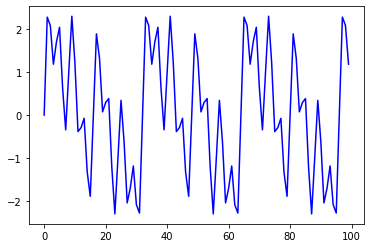

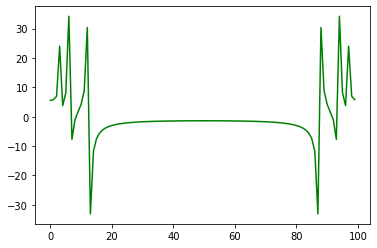

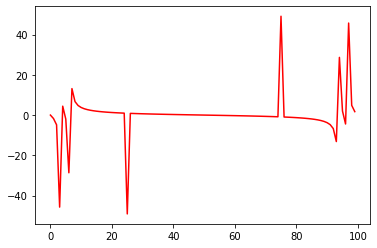

In [12]:
signal = generate_signal(100, [2, 4, 8, 16, 32], mode='sum')
transform_signal(signal)

- sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w sposobie pierwszym, ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

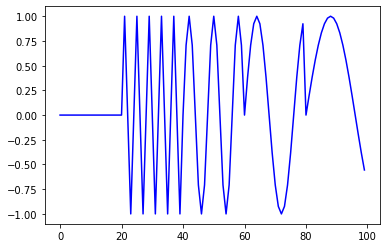

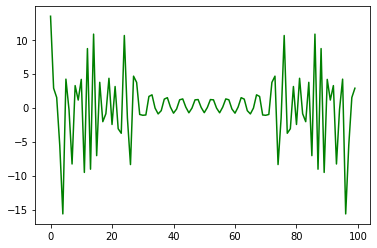

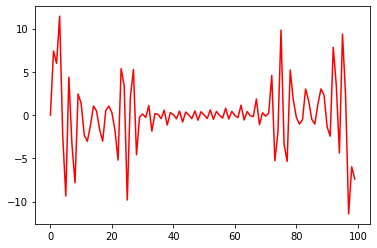

In [13]:
signal = generate_signal(100, [2, 4, 8, 16, 32], mode='span')
transform_signal(signal)

Analizując wykresy dla sygnałów obu sygnałów (pomimo tego, że utworzone zostały na dwa różne sposoby, co widać na wykresach niebieskich), możemy zauważyć symetrię zarówno dla części rzeczywistej oraz dla części urojonej (z tą różnicą, że dla części urojonej pierwsza połowa wykresu jest symetryczna względnej odwróconej drugiej jej połowy). 